# CalCOFI Dataset Analysis
Context
The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

In [11]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [12]:
# Reading the dataset

df = pd.read_csv('bottle.csv')
df_binary = df[['Salnty', 'T_degC']]
  
# Taking only the selected two attributes from the dataset
df_binary.columns = ['Sal', 'Temp']
#display the first 5 rows
df_binary.head()

<ipython-input-12-db4401c0c0f4>:3: DtypeWarning: Columns (47,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('bottle.csv')


,Sal,Temp
0,33.440,10.50
1,33.440,10.46
2,33.437,10.46
3,33.420,10.45
4,33.421,10.45


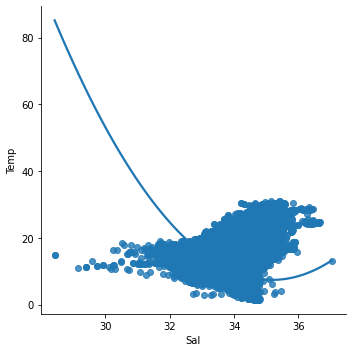

In [13]:
# Visualize the data
#plotting the Scatter plot to check relationship between Sal and Temp
sns.lmplot(x ="Sal", y ="Temp", data = df_binary, order = 2, ci = None)

In [14]:
# Eliminating NaN or missing input numbers
df_binary.fillna(method ='ffill', inplace = True)

<ipython-input-14-fe81e81b8df7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.fillna(method ='ffill', inplace = True)


## Linear Regression
The objective of Linear Regression is to find a line that minimizes the prediction error of all the data points.
The essential step in any machine learning model is to evaluate the accuracy of the model. The Mean Squared Error, Mean absolute error, Root Mean Squared Error, and R-Squared or Coefficient of determination metrics are used to evaluate the performance of the model in regression analysis.

In [15]:
# Separating the data into independent and dependent variables
# Converting each dataframe into a numpy array
# since each dataframe contains only one column
X = np.array(df_binary['Sal']).reshape(-1, 1)
y = np.array(df_binary['Temp']).reshape(-1, 1)

# Dropping any rows with Nan values
df_binary.dropna(inplace = True)

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
regr = LinearRegression()

# Fitting the model
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.20512759889279608


<ipython-input-15-4aef3a8f1459>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_binary.dropna(inplace = True)


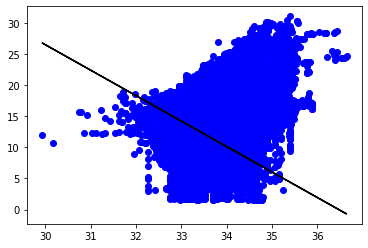

In [16]:
# Explore the result
y_pred = regr.predict(X_test)

# Data scatter of predicted values
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
plt.show()


The low accuracy score of our model suggests that our regressive model has not fit very well with the existing data. This suggests that our data is not suitable for linear regression. But sometimes, a dataset may accept a linear regressor if we consider only a part of it. Let us check for that possibility.

## Working with a smaller dataset

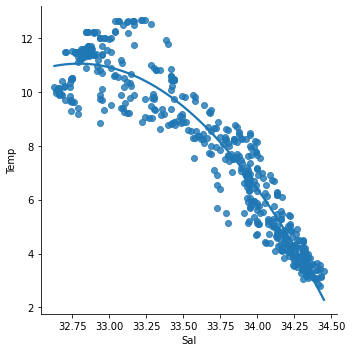

In [17]:
# Selecting the 1st 500 rows of the data
df_binary500 = df_binary[:][:500]
sns.lmplot(x ="Sal", y ="Temp", data = df_binary500,
							order = 2, ci = None)


We can already see that the first 500 rows follow a linear model. Continuing with the same steps as before. 

In [18]:
df_binary500.fillna(method ='ffill', inplace = True)

X = np.array(df_binary500['Sal']).reshape(-1, 1)
y = np.array(df_binary500['Temp']).reshape(-1, 1)

df_binary500.dropna(inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))


0.7809665643090967


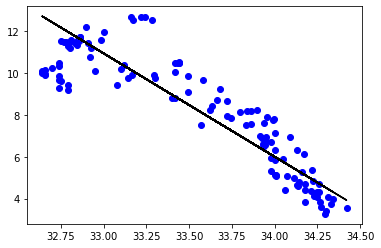

In [19]:
y_pred = regr.predict(X_test)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')

plt.show()


## Evaluation Metrics For Regression

At last, we check the performance of the Linear Regression model with help of evaluation metrics. For Regression algorithms we widely use mean_absolute_error, and mean_squared_error metrics to check the model performance. 

In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)
#squared True returns MSE value, False returns RMSE value.
mse = mean_squared_error(y_true=y_test,y_pred=y_pred) #default=True
rmse = mean_squared_error(y_true=y_test,y_pred=y_pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)


MAE: 0.9879706709516711
MSE: 1.6332507527838234
RMSE: 1.2779869924157379


### Mean Absolute Error MAE: 
The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.

![Getting Started](./mae.png)


### Mean Square Error MSE:
Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals. 

![Getting Started](./mse.png)

### Root Mean Square Error RMSE:
Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

![Getting Started](./rmse.png)


### R-squared
The coefficient of determination or R-squared represents the proportion of the variance in the dependent variable which is explained by the linear regression model. It is a scale-free score i.e. irrespective of the values being small or large, the value of R square will be less than one.

![Getting Started](./rsqr.png)

### Conclusion

Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. The RMSE tells how well a regression model can predict the value of a response variable in absolute terms while R- Squared tells how well the predictor variables can explain the variation in the response variable.